In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [10]:
# Load both datasets
D_data = pd.read_csv("dengue_data.csv", index_col=0)
D_metadata = pd.read_csv("dengue_metadata.csv",index_col=0)

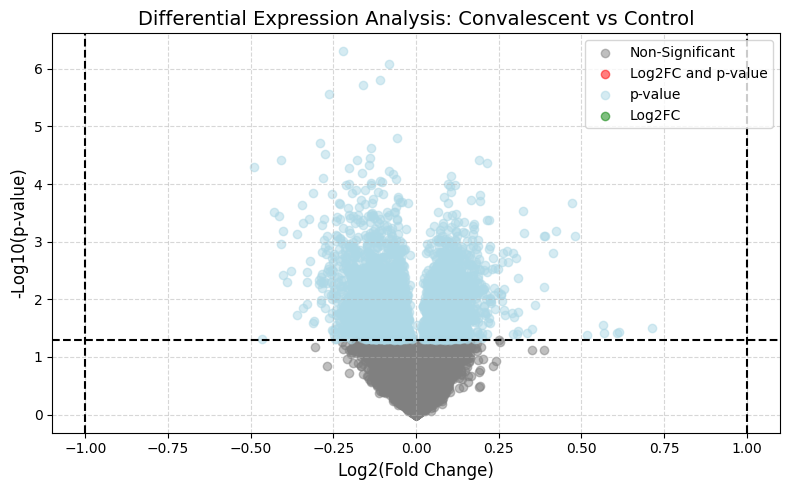

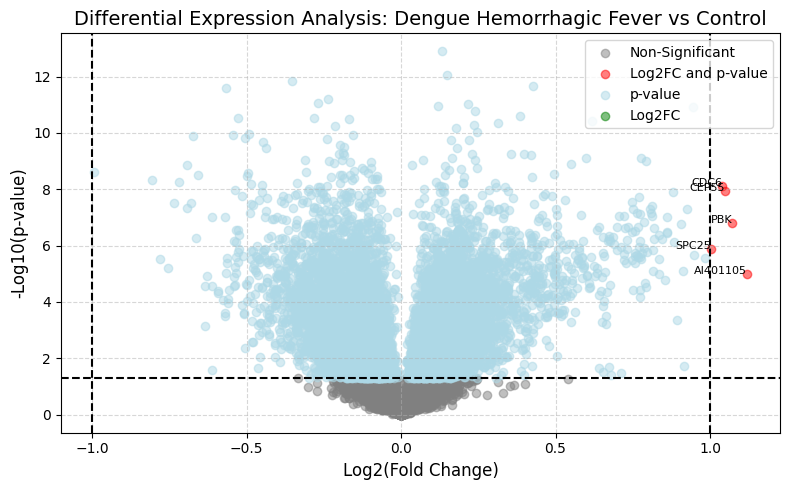

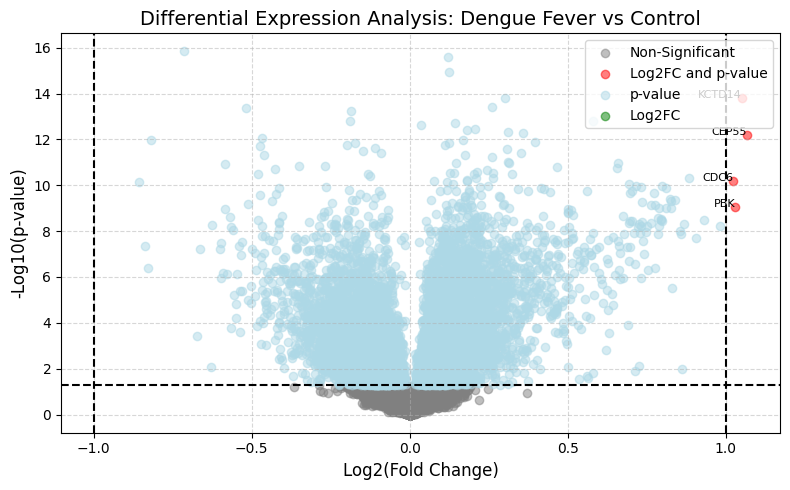

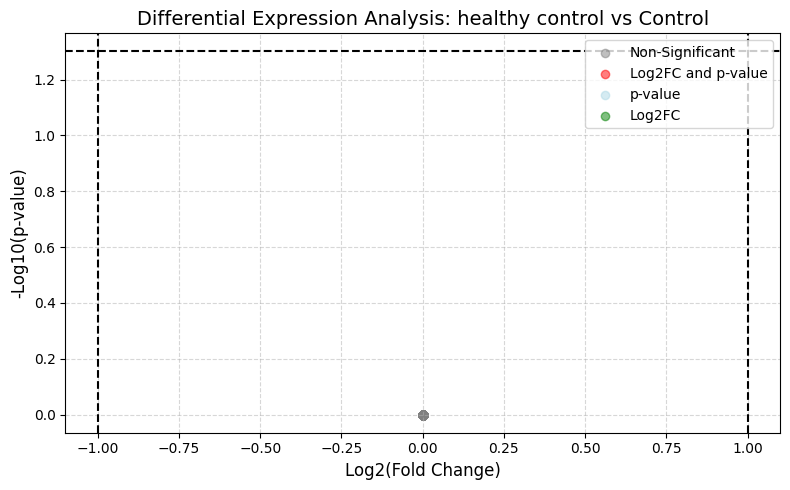

In [11]:
# Get unique disease states
unique_disease_states = D_metadata['disease.state'].unique()

# Set significance thresholds
log2FC_threshold = 1.0
p_value_threshold = 0.05

# Iterate over each disease state and create a volcano plot
for disease_state in unique_disease_states:
    # Separate gene expression data for control and current disease state 
    gene_expression_control = D_data.loc[:, D_metadata[D_metadata['disease.state'] == 'healthy control'].index]
    gene_expression_disease = D_data.loc[:, D_metadata[D_metadata['disease.state'] == disease_state].index]

    # Calculate fold change and p-value for each gene
    fold_change = np.mean(gene_expression_disease, axis=1) - np.mean(gene_expression_control, axis=1)
    t_stat, p_value = ttest_ind(gene_expression_disease, gene_expression_control, axis=1)

    # Create a DataFrame with the statistical values
    result_df = pd.DataFrame({'log2fc': fold_change, 'p_value': p_value}, index=D_data.index)

    # Identify significantly differentially expressed genes
    upregulated_genes = result_df.index[(result_df['log2fc'] > log2FC_threshold) & (result_df['p_value'] < p_value_threshold)]
    downregulated_genes = result_df.index[(result_df['log2fc'] < -log2FC_threshold) & (result_df['p_value'] < p_value_threshold)]
    non_significant_genes = result_df.index[(result_df['p_value'] >= p_value_threshold)]

    # Identify genes within the boundary (between log2FC and p-value thresholds)
    pvalue_genes = result_df.index[
        (result_df['log2fc'] <= log2FC_threshold) & (result_df['log2fc'] >= -log2FC_threshold) & (result_df['p_value'] < p_value_threshold)
    ]

    # Identify genes above the p-value threshold and within the log2fc threshold
    log2fc_genes = result_df.index[(result_df['log2fc'] >= log2FC_threshold) & (result_df['p_value'] > p_value_threshold)]

    # Find top upregulated and downregulated genes
    top_upregulated_genes = result_df.loc[upregulated_genes].nlargest(10, 'log2fc')
    top_downregulated_genes = result_df.loc[downregulated_genes].nsmallest(10, 'log2fc')

    # Create the volcano plot for the current disease state
    plt.figure(figsize=(8, 5))

    # Plot all points in light grey
    plt.scatter(result_df['log2fc'][non_significant_genes], -np.log10(result_df['p_value'][non_significant_genes]), color='grey', alpha=0.5, label='Non-Significant', marker='o')

    # Highlight upregulated and downregulated genes in purple
    plt.scatter(result_df['log2fc'][upregulated_genes], -np.log10(result_df['p_value'][upregulated_genes]), color='red', alpha=0.5, label='Log2FC and p-value', marker='o')
    plt.scatter(result_df['log2fc'][downregulated_genes], -np.log10(result_df['p_value'][downregulated_genes]), color='red', alpha=0.5, marker='o')

    # Highlight genes within the boundary in light blue
    plt.scatter(result_df['log2fc'][pvalue_genes], -np.log10(result_df['p_value'][pvalue_genes]), color='lightblue', alpha=0.5, label='p-value', marker='o')

    # Highlight genes above the p-value threshold and within the log2fc threshold in green
    plt.scatter(result_df['log2fc'][log2fc_genes], -np.log10(result_df['p_value'][log2fc_genes]), color='green', alpha=0.5, label='Log2FC', marker='o')

    # Plot top 10 upregulated genes
    for gene in top_upregulated_genes.index:
        plt.annotate(gene, (result_df['log2fc'][gene], -np.log10(result_df['p_value'][gene])), color='black', fontsize=8, ha='right')

    # Plot top 10 downregulated genes
    for gene in top_downregulated_genes.index:
        plt.annotate(gene, (result_df['log2fc'][gene], -np.log10(result_df['p_value'][gene])), color='black', fontsize=8, ha='left')

    plt.axhline(y=-np.log10(p_value_threshold), color='black', linestyle='--')
    plt.axvline(x=log2FC_threshold, color='black', linestyle='--')
    plt.axvline(x=-log2FC_threshold, color='black', linestyle='--')
    plt.xlabel("Log2(Fold Change)", fontsize=12)
    plt.ylabel("-Log10(p-value)", fontsize=12)
    plt.title("Differential Expression Analysis: {} vs Control".format(disease_state), fontsize=14)
    plt.legend(loc='upper right', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig('vp_{}.png'.format(disease_state), dpi=300)
    plt.show()


In [12]:
# Set significance thresholds
log2FC_threshold = 1.0
p_value_threshold = 0.05

# Create empty dictionaries to store top regulated genes for Dengue Fever (DF) and Dengue Hemorrhagic Fever (DHF)
top_upregulated_genes_DF, top_upregulated_genes_DHF = {}, {}
p_values_upregulated_genes_DF, p_values_upregulated_genes_DHF = {}, {}
fold_changes_upregulated_genes_DF, fold_changes_upregulated_genes_DHF = {}, {}

# Separate gene expression data for healthy control, Dengue Fever (DF), and Dengue Hemorrhagic Fever (DHF)
gene_expression_control = D_data.loc[:, D_metadata[D_metadata['disease.state'] == 'healthy control'].index]
gene_expression_DF = D_data.loc[:, D_metadata[D_metadata['disease.state'] == 'Dengue Fever'].index]
gene_expression_DHF = D_data.loc[:, D_metadata[D_metadata['disease.state'] == 'Dengue Hemorrhagic Fever'].index]

# Calculate fold change and p-value for each gene for DF
fold_change_DF = np.mean(gene_expression_DF, axis=1) - np.mean(gene_expression_control, axis=1)
t_stat_DF, p_value_DF = ttest_ind(gene_expression_DF, gene_expression_control, axis=1)

# Create a DataFrame with the statistical values for DF
result_df_DF = pd.DataFrame({'fold_change': fold_change_DF, 'p_value': p_value_DF}, index=D_data.index)

# Identify significantly differentially expressed genes for DF
upregulated_genes_DF = result_df_DF.index[(result_df_DF['fold_change'] > log2FC_threshold) & (result_df_DF['p_value'] < p_value_threshold)]

# Get top 5 upregulated genes for DF
top_upregulated_genes_DF['Genes'] = result_df_DF.loc[upregulated_genes_DF].nlargest(5, 'fold_change').index.tolist()
top_upregulated_genes_DF['P-Values'] = result_df_DF.loc[top_upregulated_genes_DF['Genes'], 'p_value'].tolist()
top_upregulated_genes_DF['Fold Changes'] = result_df_DF.loc[top_upregulated_genes_DF['Genes'], 'fold_change'].tolist()

# Pad the lists to ensure they have a length of 5
for key in ['Genes', 'P-Values', 'Fold Changes']:
    top_upregulated_genes_DF[key] += [np.nan] * (5 - len(top_upregulated_genes_DF[key]))

# Calculate fold change and p-value for each gene for DHF
fold_change_DHF = np.mean(gene_expression_DHF, axis=1) - np.mean(gene_expression_control, axis=1)
t_stat_DHF, p_value_DHF = ttest_ind(gene_expression_DHF, gene_expression_control, axis=1)

# Create a DataFrame with the statistical values for DHF
result_df_DHF = pd.DataFrame({'fold_change': fold_change_DHF, 'p_value': p_value_DHF}, index=D_data.index)

# Identify significantly differentially expressed genes for DHF
upregulated_genes_DHF = result_df_DHF.index[(result_df_DHF['fold_change'] > log2FC_threshold) & (result_df_DHF['p_value'] < p_value_threshold)]

# Get top 5 upregulated genes for DHF
top_upregulated_genes_DHF['Genes'] = result_df_DHF.loc[upregulated_genes_DHF].nlargest(5, 'fold_change').index.tolist()
top_upregulated_genes_DHF['P-Values'] = result_df_DHF.loc[top_upregulated_genes_DHF['Genes'], 'p_value'].tolist()
top_upregulated_genes_DHF['Fold Changes'] = result_df_DHF.loc[top_upregulated_genes_DHF['Genes'], 'fold_change'].tolist()

# Pad the lists to ensure they have a length of 5
for key in ['Genes', 'P-Values', 'Fold Changes']:
    top_upregulated_genes_DHF[key] += [np.nan] * (5 - len(top_upregulated_genes_DHF[key]))

# Create DataFrames
df_top_upregulated_DF = pd.DataFrame(top_upregulated_genes_DF)
df_top_upregulated_DHF = pd.DataFrame(top_upregulated_genes_DHF)

# Update the index to start from 1 instead of 0
df_top_upregulated_DF.index += 1
df_top_upregulated_DHF.index += 1

# Display the DataFrames for DF
print("Top Upregulated Genes in Dengue Fever (DF):\n")
print(df_top_upregulated_DF)

# Display the DataFrames for DHF
print("\nTop Upregulated Genes in Dengue Hemorrhagic Fever (DHF):\n")
print(df_top_upregulated_DHF)


Top Upregulated Genes in Dengue Fever (DF):

    Genes      P-Values  Fold Changes
1   CEP55  6.722797e-13      1.068829
2  KCTD14  1.635960e-14      1.051681
3     PBK  8.945543e-10      1.029902
4    CDC6  6.548886e-11      1.024087
5     NaN           NaN           NaN

Top Upregulated Genes in Dengue Hemorrhagic Fever (DHF):

      Genes      P-Values  Fold Changes
1  AI401105  9.854547e-06      1.120596
2       PBK  1.519247e-07      1.072204
3     CEP55  1.109219e-08      1.047144
4      CDC6  7.922875e-09      1.039302
5     SPC25  1.298202e-06      1.003204
